# Application 1: Heart Disease Detection

Predict the health condition of the patient. 

Dataset: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets, preprocessing, metrics 
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import clear_output

In [3]:
columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
data = pd.read_csv('processed.cleveland.csv', header=None, names=columns)

14 attributes used:
    
1. age: age in years
    
2. sex: sex (1 = male; 0 = female)

3. cp: chest pain type (1: typical angina; 2: atypical angina; 3: non-anginal pain; 4: asymptomatic)

4. trestbps: resting blood pressure (in mm Hg on admission to the hospital) 

5. chol: serum cholestoral in mg/dl

6. fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

7. restecg: resting electrocardiographic results (0: normal; 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2: showing probable or definite left ventricular hypertrophy by Estes' criteria)

8. thalach: maximum heart rate achieved

9. exang: exercise induced angina (1 = yes; 0 = no)

10.oldpeak: ST depression induced by exercise relative to rest

11.slope: the slope of the peak exercise ST segment( 1 = upsloping, 2 = flat, 3 = downsloping )

12.ca: number of major vessels (0-3) colored by flourosopy

13.thal: (3 = normal; 6 = fixed defect; 7 = reversable defect)

14.num: the predicted attribute

The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
# look for NaN values in each column
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [6]:
# preprocessing

# Update NaN values with mean of the respective column values
data['ca'] = data.ca.fillna(data.ca.mean())
data['thal'] = data.thal.fillna(data.thal.mean())

# If the goal field is < 2, we treat that the sample belongs to a healthy person.
data['num'] = data.num.map({0: 0, 1: 0, 2: 1, 3: 1, 4: 1})
# 0 -  Healthy
# 1 -  Unhealthy

In [7]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [8]:
data['num'].value_counts()

0    219
1     84
Name: num, dtype: int64

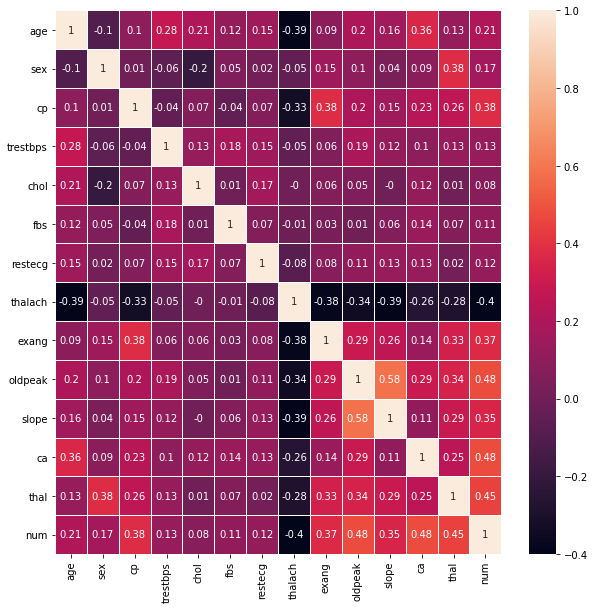

In [9]:
# Correlation matrix measures the linear relationships between the variables
correlation_matrix = data.corr().round(2)
plt.figure(figsize = (10,10))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5)
plt.show()

In [10]:
min_max_scaler = preprocessing.MinMaxScaler()

X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

# Normalize features
X = min_max_scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [11]:
print(f'No. of train samples: {len(X_train)}')
print(f'No. of test samples: {len(X_test)}')

No. of train samples: 212
No. of test samples: 91


### Logistic Regression

In [12]:
lr_classifier = LogisticRegression(penalty='l2', #Ridge
                                   tol=0.0001,
                                   fit_intercept=True, 
                                   random_state=None, 
                                   max_iter=100)

**penalty**
- {'l1', 'l2', 'elasticnet', 'none'}
- default = 'l2'
- Used to specify the norm used in the penalization. 

**tol** 
- default = 1e-4
- Tolerance for stopping criteria.

**fit_intercept**
- default = True
- Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.

**max_iterint** 
- default=100
- Maximum number of iterations

In [13]:
lr_classifier.fit(X_train, Y_train)

LogisticRegression()

In [14]:
print(f'No. of classes: {lr_classifier.classes_}')
print(f'Coefficients: {lr_classifier.coef_}')
print(f'Intercept: {lr_classifier.intercept_}')
print(f'No. of iterations: {lr_classifier.n_iter_}')

No. of classes: [0 1]
Coefficients: [[ 0.32048758  0.20557692  1.10739522  0.58822531  0.34255745  0.22195851
   0.17862002 -0.77045657  0.92611851  1.82320996  0.99314822  2.11911569
   1.38989349]]
Intercept: [-4.62810114]
No. of iterations: [23]


Note:

- If fit_intercept is set to False, the intercept is set to zero.

In [15]:
y_pred = lr_classifier.predict(X_test)

In [16]:
print(confusion_matrix(Y_test, y_pred))

[[60  6]
 [ 9 16]]


In [17]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        66
           1       0.73      0.64      0.68        25

    accuracy                           0.84        91
   macro avg       0.80      0.77      0.78        91
weighted avg       0.83      0.84      0.83        91



### Gaussian Naive Bayes Classifier

In [18]:
gnb_classifier = GaussianNB()

In [19]:
gnb_classifier.fit(X_train, Y_train)
y_pred = gnb_classifier.predict(X_test)

In [20]:
print(confusion_matrix(Y_test, y_pred))

[[56 10]
 [ 6 19]]


In [21]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88        66
           1       0.66      0.76      0.70        25

    accuracy                           0.82        91
   macro avg       0.78      0.80      0.79        91
weighted avg       0.84      0.82      0.83        91



### Support Vector Machine

In [22]:
svc_classifier = SVC(C=1.0, 
                     kernel='rbf', 
                     degree=3, gamma='scale', 
                     coef0=0.0, 
                     shrinking=True, 
                     probability=False, 
                     tol=0.001, 
                     cache_size=200, 
                     class_weight=None, 
                     verbose=False,
                     max_iter=- 1, 
                     decision_function_shape='ovr', 
                     break_ties=False, 
                     random_state=None)

In [23]:
svc_classifier.fit(X_train, Y_train)
y_pred = svc_classifier.predict(X_test)

In [24]:
print(confusion_matrix(Y_test, y_pred))

[[57  9]
 [ 5 20]]


In [25]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        66
           1       0.69      0.80      0.74        25

    accuracy                           0.85        91
   macro avg       0.80      0.83      0.82        91
weighted avg       0.86      0.85      0.85        91



### KNN Classifier

In [26]:
kn_classifier = KNeighborsClassifier(n_neighbors=5, 
                                     weights='uniform', 
                                     algorithm='auto', #used to identify nearest neighbours
                                     p=2, #euclidean_distance
                                     metric='minkowski')

**n_neighbors**

- default = 5
- Number of neighbors to use by default for kneighbors queries.

**weights**

- default = 'uniform'
- weight function used in prediction. 

Possible values:
    
- 'uniform' : All points in each neighborhood are weighted equally.
- 'distance' : Weight points by the inverse of their distance. 

**algorithm**

- default = 'auto'
- Algorithm used to compute the nearest neighbors:
    - 'ball_tree' will use BallTree
    - 'kd_tree' will use KDTree
    - 'brute' will use a brute-force search.
    - 'auto' will attempt to decide the most appropriate algorithm based on the values passed to fit method.

**p** 
- default=2
- Power parameter for the Minkowski metric. 
- When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. 
- For arbitrary p, minkowski_distance (l_p) is used.

**metric**
- default='minkowski'
- The distance metric to use for the tree. 
- The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. 

In [27]:
kn_classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [28]:
print(f'Effective Metric = {kn_classifier.effective_metric_}')

Effective Metric = euclidean


In [29]:
y_pred = kn_classifier.predict(X_test)

In [30]:
print(confusion_matrix(Y_test, y_pred))

[[58  8]
 [ 8 17]]


In [31]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        66
           1       0.68      0.68      0.68        25

    accuracy                           0.82        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.82      0.82      0.82        91



### Linear Discriminant Analysis

In [32]:
lda_classifier = LinearDiscriminantAnalysis(solver='svd', 
                                            shrinkage=None, 
                                            priors=None, 
                                            n_components=None, 
                                            store_covariance=False, 
                                            tol=0.0001, 
                                            covariance_estimator=None
                                           )
# How many dimensions / features were used for the classification?
# If a subset was used, how was it decided?
# Can we see the mean and scatter of each feature used?

**solver**

Solver to use, possible values
- svd: Singular value decomposition (default). Does not compute the covariance matrix, therefore this solver is recommended for data with a large number of features.
- lsqr: Least squares solution. Can be combined with shrinkage or custom covariance estimator.
- eigen: Eigenvalue decomposition. Can be combined with shrinkage or custom covariance estimator.

**shrinkage**

Shrinkage parameter, possible values:
- None: no shrinkage (default).
- auto: automatic shrinkage using the Ledoit-Wolf lemma.
- float between 0 and 1: fixed shrinkage parameter.

This should be left to None if covariance_estimator is used. Note that shrinkage works only with lsqr and eigen solvers.

**priors**
- The class prior probabilities. 
- By default, the class proportions are inferred from the training data.

**n_components**
- Number of components (<= min(n_classes - 1, n_features)) for dimensionality reduction.
- If None, will be set to min(n_classes - 1, n_features). 
- This parameter only affects the transform method.

**store_covariance**
- If True, explicitly compute the weighted within-class covariance matrix when solver is 'svd'. 
- The matrix is always computed and stored for the other solvers.

**tol**
- Absolute threshold for a singular value of X to be considered significant, used to estimate the rank of X.
- Dimensions whose singular values are non-significant are discarded. 
- Only used if solver is 'svd'.

**covariance_estimator**
- If not None, covariance_estimator is used to estimate the covariance matrices instead of relying on the empirical covariance estimator (with potential shrinkage). 
- The object should have a fit method and a covariance_ attribute like the estimators in sklearn.covariance. 
- If None the shrinkage parameter drives the estimate.
- This should be left to None if shrinkage is used. 
- Note that covariance_estimator works only with 'lsqr' and 'eigen' solvers.

In [33]:
lda_classifier.fit(X_train, Y_train)
y_pred = lda_classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))
print("----")

Accuracy: 0.8351648351648352
Precision: 0.7083333333333334
Recall: 0.68
----


In [34]:
lda_classifier.classes_

array([0, 1], dtype=int64)

In [35]:
lda_classifier.means_

array([[0.49741285, 0.64705882, 0.64705882, 0.34837835, 0.2627063 ,
        0.12418301, 0.43464052, 0.64616075, 0.20261438, 0.11121653,
        0.24509804, 0.11693299, 0.33780101],
       [0.59569209, 0.81355932, 0.9039548 , 0.39222897, 0.28890953,
        0.18644068, 0.53389831, 0.50058222, 0.62711864, 0.32695462,
        0.48305085, 0.45762712, 0.81243313]])

### Decision Tree Classifier

In [36]:
dt_classifier = DecisionTreeClassifier(criterion='gini', 
                                       splitter='best', 
                                       max_depth=None, 
                                       min_samples_split=2, 
                                       min_samples_leaf=1, 
                                       min_weight_fraction_leaf=0.0, 
                                       max_features=None, 
                                       random_state=None, 
                                       max_leaf_nodes=None, 
                                       min_impurity_decrease=0.0, 
                                       class_weight=None, 
                                       ccp_alpha=0.0
                                      )

**criterion {“gini”, “entropy”}**
The function to measure the quality of a split. 
Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**splitter {“best”, “random”}**
The strategy used to choose the split at each node. 

**max_depth**
The maximum depth of the tree. 
If None, then nodes are expanded until all leaves are pure 
or until all leaves contain less than min_samples_split samples.

**min_samples_split**
The minimum number of samples required to split an internal node.

**min_samples_leaf**
The minimum number of samples required to be at a leaf node. 
A split point at any depth will only be considered 
if it leaves at least min_samples_leaf training samples in each of the left and right branches.

**min_weight_fraction_leaf**
The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. 
Samples have equal weight when sample_weight is not provided.

**max_features**

The number of features to consider when looking for the best split:
  - If int, then consider max_features features at each split.
  - If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
  - If “auto”, then max_features=sqrt(n_features).
  - If “sqrt”, then max_features=sqrt(n_features).
  - If “log2”, then max_features=log2(n_features).
  - If None, then max_features=n_features.

**random_state**
- Controls the randomness of the estimator. 
- The features are always randomly permuted at each split, even if splitter is set to "best".
- When max_features < n_features, the algorithm will select max_features at random at each split before finding the best split among them. 
- But the best found split may vary across different runs, even if max_features=n_features. 
- That is the case, if the improvement of the criterion is identical for several splits and one split has to be selected at random. 
- To obtain a deterministic behaviour during fitting, random_state has to be fixed to an integer. 

**max_leaf_nodes**
- Grow a tree with max_leaf_nodes in best-first fashion. 
- Best nodes are defined as relative reduction in impurity. 
- If None then unlimited number of leaf nodes.

**min_impurity_decrease**
- A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

**class_weight**
- Weights associated with classes in the form {class_label: weight}. 
- If None, all classes are supposed to have weight one. 

**ccp_alpha**
- Complexity parameter used for Minimal Cost-Complexity Pruning. 
- The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. 
- By default, no pruning is performed. 

In [37]:
dt_classifier.fit(X_train, Y_train)

# Root
# Visualize the tree
# Depth of the tree?
# Gini Index of nodes?

DecisionTreeClassifier()

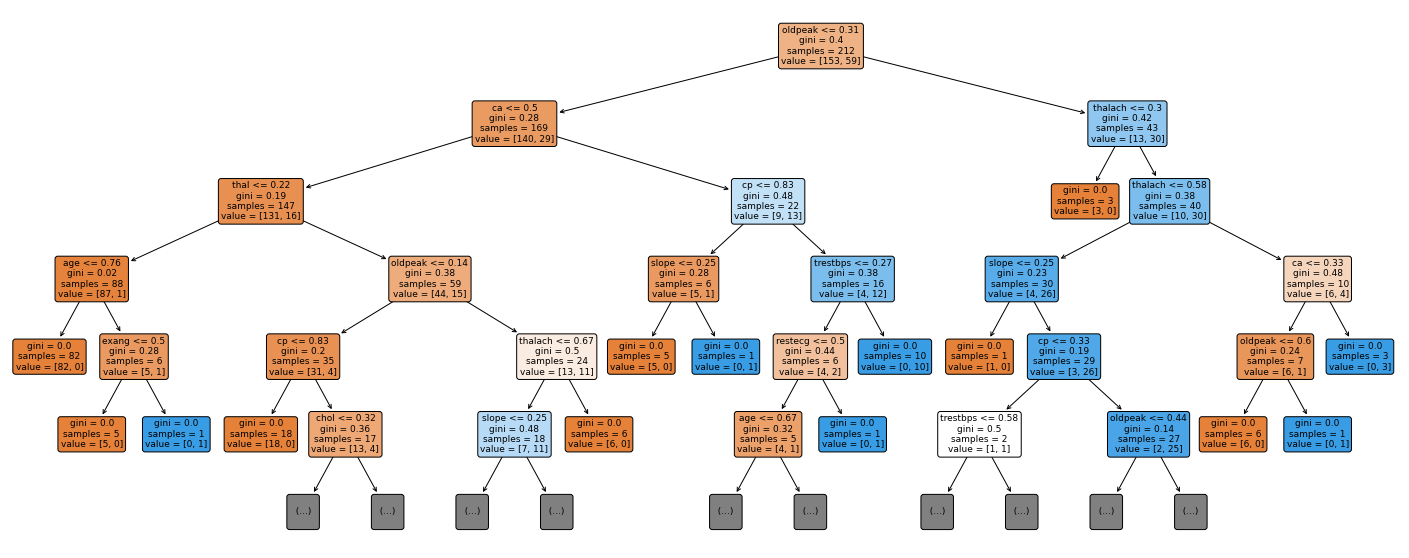

In [38]:
fig = plt.figure(figsize=(25,10))
plot_tree(dt_classifier, 
          max_depth = 5,
          feature_names = data.columns[0:-1],
          rounded = True, 
          precision = 2,
          filled = True)
plt.show()

In [39]:
y_pred = dt_classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))

Accuracy: 0.7912087912087912
Precision: 0.625
Recall: 0.6


In [40]:
# fig.savefig("decision_tree.png")

In [41]:
dt_classifier.classes_

array([0, 1], dtype=int64)

In [42]:
dt_classifier.n_classes_

2

In [43]:
dt_classifier.n_outputs_

1

In [44]:
dt_classifier.feature_importances_

array([0.01069284, 0.        , 0.07178656, 0.10309679, 0.04208898,
       0.        , 0.01252539, 0.12643571, 0.04775304, 0.30950113,
       0.05755312, 0.16963696, 0.04892948])

In [45]:
dt_classifier.max_features_

13

## Random Forest

In [46]:
### Random Forest

In [47]:
# How may trees were build?
# Can we see those trees?
# How many columns were chosen to decide the root node in those trees?

# Bagging =  Bootstrapping + Aggregation
# Out-of-the-bag Dataset

In [48]:
rf_classifier = RandomForestClassifier(n_estimators=100, 
                                       criterion='gini', 
                                       max_depth=None, 
                                       min_samples_split=2, 
                                       min_samples_leaf=1, 
                                       min_weight_fraction_leaf=0.0, 
                                       max_features='auto', 
                                       max_leaf_nodes=None, 
                                       min_impurity_decrease=0.0, 
                                       min_impurity_split=None, 
                                       bootstrap=True, 
                                       oob_score=False, 
                                       n_jobs=None, 
                                       random_state=None, 
                                       verbose=0, 
                                       warm_start=False, 
                                       class_weight=None, 
                                       ccp_alpha=0.0, 
                                       max_samples=None)

**n_estimators**
- The number of trees in the forest.

**min_impurity_split**
- Threshold for early stopping in tree growth. 
- A node will split if its impurity is above the threshold, otherwise it is a leaf.

**bootstrap**
- Whether bootstrap samples are used when building trees. 
- If False, the whole dataset is used to build each tree.

**oob_scorebool**
- Whether to use out-of-bag samples to estimate the generalization score. 
- Only available if bootstrap=True.

**n_jobs**
- The number of jobs to run in parallel. fit, predict, decision_path and apply are all parallelized over the trees.

**warm_start**
- When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest.

In [49]:
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier()

In [50]:
y_pred = rf_classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))

Accuracy: 0.8021978021978022
Precision: 0.6521739130434783
Recall: 0.6


In [51]:
# Extract single tree
estimator = rf_classifier.estimators_[0]

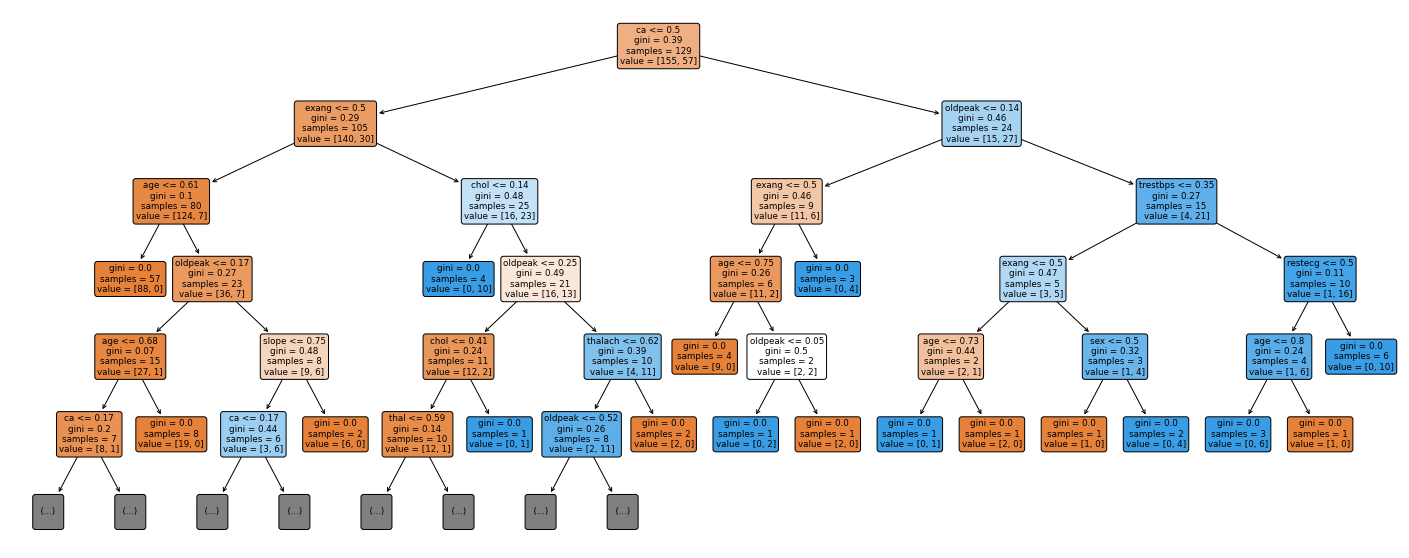

In [52]:
fig = plt.figure(figsize=(25,10))
plot_tree(estimator, 
          max_depth = 5,
          feature_names = data.columns[0:-1],
          rounded = True, 
          precision = 2,
          filled = True)
plt.show()

In [53]:
# Extract single tree
estimator = rf_classifier.estimators_[1]

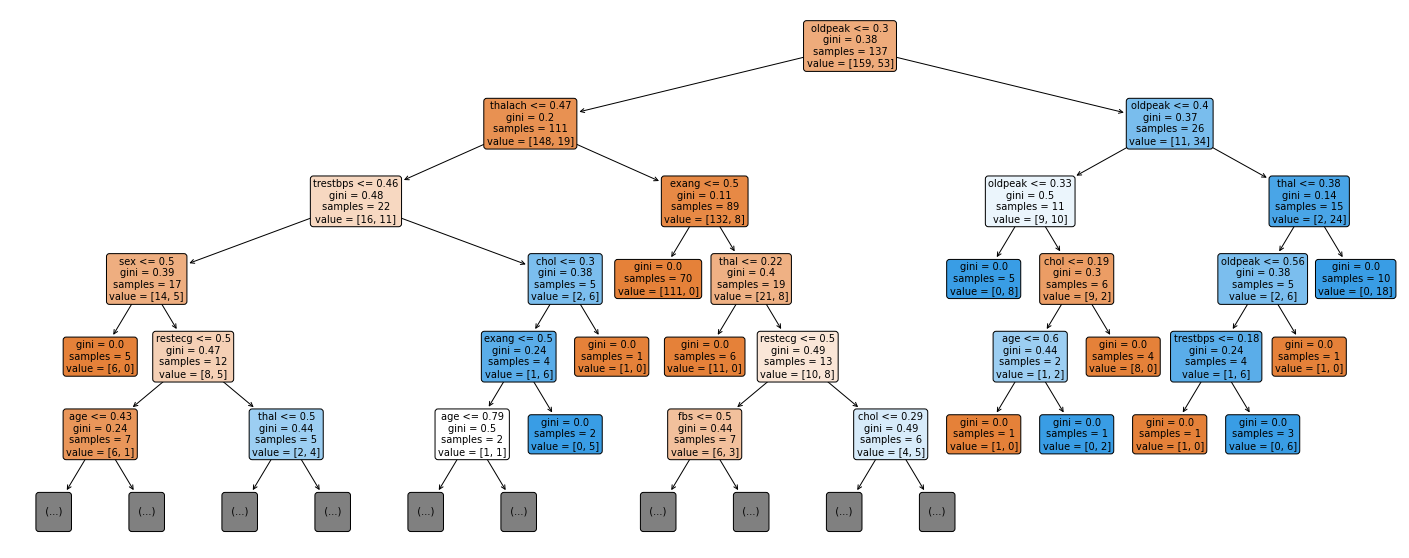

In [54]:
fig = plt.figure(figsize=(25,10))
plot_tree(estimator, 
          max_depth = 5,
          feature_names = data.columns[0:-1],
          rounded = True, 
          precision = 2,
          filled = True)
plt.show()

In [55]:
lr_classifier.n_iter_

array([23])

In [56]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [57]:
age = widgets.Text(description="age")
sex = widgets.Text(description="sex")
cp = widgets.Text(description="cp")
trestbps = widgets.Text(description="trestbps")
chol = widgets.Text(description="chol")
fbs = widgets.Text(description="fbs")
restecg = widgets.Text(description="restecg")
thalach = widgets.Text(description="thalach")
exang = widgets.Text(description="exang")
oldpeak = widgets.Text(description="oldpeak")
slope = widgets.Text(description="slope")
ca = widgets.Text(description="ca")
thal = widgets.Text(description="thal")

In [58]:
display(age)
display(sex)
display(cp)
display(trestbps)
display(chol)
display(fbs)
display(restecg)
display(thalach)
display(exang)
display(oldpeak)
display(slope)
display(ca)
display(thal)

Text(value='', description='age')

Text(value='', description='sex')

Text(value='', description='cp')

Text(value='', description='trestbps')

Text(value='', description='chol')

Text(value='', description='fbs')

Text(value='', description='restecg')

Text(value='', description='thalach')

Text(value='', description='exang')

Text(value='', description='oldpeak')

Text(value='', description='slope')

Text(value='', description='ca')

Text(value='', description='thal')

In [59]:
algorithm = widgets.Dropdown(
    options = [('Logistic Regression', 'LR'), 
               ('Linear Discriminant Analysis ', 'LDA'), 
               ('Support Vector Machines', 'SVM'),
               ('K-Nearest Neighbors', 'KN'),
               ('Naive Bayes', 'NB'),
               ('Decision Trees', 'DT'),
               ('Random Forest', 'RF'),
              ],
    disabled = False,
)

print('Select Algorithm')
display(algorithm)

Select Algorithm


Dropdown(options=(('Logistic Regression', 'LR'), ('Linear Discriminant Analysis ', 'LDA'), ('Support Vector Ma…

In [60]:
prediction = widgets.Output()

button_predict = widgets.Button(description="Predict")

def on_button_predict_clicked(b):
    
    input_data = {}
    input_data['age'] = float(age.value)
    input_data['sex'] = float(sex.value)
    input_data['cp'] = float(cp.value)
    input_data['trestbps'] = float(trestbps.value)
    input_data['chol'] = float(chol.value)
    input_data['fbs'] = float(fbs.value)
    input_data['restecg'] = float(restecg.value)
    input_data['thalach'] = float(thalach.value)
    input_data['exang'] = float(exang.value)
    input_data['oldpeak'] = float(oldpeak.value)
    input_data['slope'] = float(slope.value)
    input_data['ca'] = float(ca.value)
    input_data['thal'] = float(thal.value)
    
    user_input = pd.DataFrame(input_data, columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'], index=[0])
    
    selected_algorithm = algorithm.value
    
    if selected_algorithm == 'LR':
        classifier = lr_classifier
    elif selected_algorithm == 'LDA':
        classifier = lda_classifier
    elif selected_algorithm == 'SVM':
        classifier = svc_classifier        
    elif selected_algorithm == 'KN':
        classifier = kn_classifier
    elif selected_algorithm == 'NB':
        classifier = gnb_classifier
    elif selected_algorithm == 'DT':
        classifier = dt_classifier
    elif selected_algorithm == 'RF':
        classifier = rf_classifier
        
    with prediction:
        clear_output(True)
        print(f'Selected Algorithm = {selected_algorithm}')
        print(classifier.predict(user_input)[0])
        
button_predict.on_click(on_button_predict_clicked)

In [61]:
display(button_predict)
display(prediction)

Button(description='Predict', style=ButtonStyle())

Output()